## Observations and Insights 

## Write at least three observations or inferences that can be made from the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
series = merged_df[merged_df["Timepoint" ] == 0]["Mouse ID"].value_counts() >1 
df = pd.DataFrame(series)
df[df["Mouse ID"] == True]

,Mouse ID
g989,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop(index = [908,910,912,914,916])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
#MEAN
mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#MEDIAN
median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#VARIANCE
var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#STANDARD DEVIATION
std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#SEM
sqrt_regimen_count = np.sqrt(cleaned_df["Drug Regimen"].value_counts())
sem = std/sqrt_regimen_count
sem

Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
dtype: float64

In [13]:
summary_df = pd.DataFrame({
                            "Mean":mean, "Median":median, "Variance":var, "Standard Deviation":std, "SEM":sem
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of mice per drug regimen')

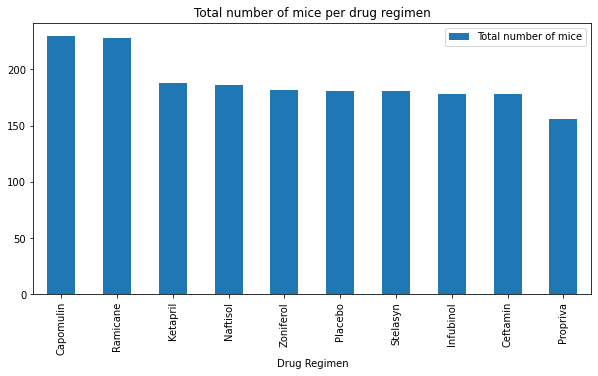

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

cleaned_df["Drug Regimen"].value_counts()

total_mice_number_df = pd.DataFrame(cleaned_df["Drug Regimen"].value_counts())

index = total_mice_number_df.index
index.name = "Drug Regimen"

total_mice_number_df.rename(columns = {"Drug Regimen":"Total number of mice"}, inplace = True)

total_mice_number_df.plot(kind = "bar", figsize = (10,5))

plt.title("Total number of mice per drug regimen")


<BarContainer object of 10 artists>

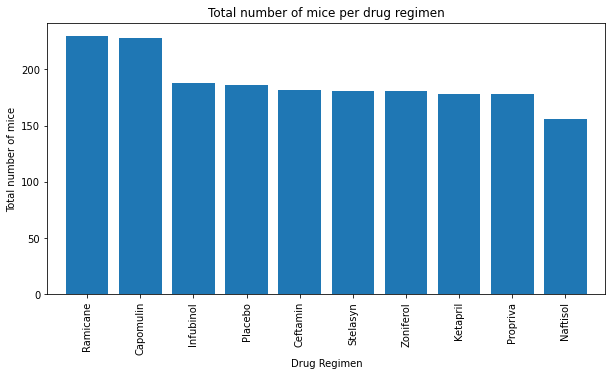

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen = cleaned_df["Drug Regimen"].unique()
length = len(cleaned_df["Drug Regimen"].value_counts())

plt.figure(figsize=(10,5))

x_axis = np.arange(length)

plt.xlim(-0.75,9.75)
plt.xticks(x_axis, regimen, rotation = "vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per drug regimen")

plt.bar(x_axis, cleaned_df["Drug Regimen"].value_counts())



Text(0, 0.5, '')

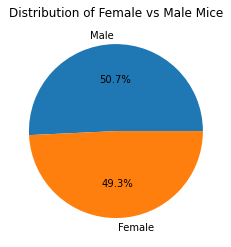

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Females","Males"]

sex = list(cleaned_df["Sex"].value_counts())
male_size = sex[0]
fem_size = sex[1]
sizes = [fem_size,male_size]

colors = ["lightcoral","lightskyblue"]

df = pd.DataFrame(cleaned_df.loc[:,"Sex"].value_counts())

df.loc[:,"Sex"].plot(kind="pie", title=("Distribution of Female vs Male Mice"),autopct="%1.1f%%")
plt.ylabel("")

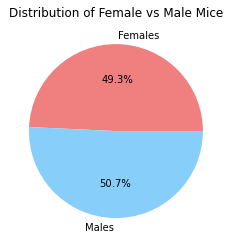

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Females","Males"]

sex = list(cleaned_df["Sex"].value_counts())
male_size = sex[0]
fem_size = sex[1]
sizes = [fem_size,male_size]

colors = ["lightcoral","lightskyblue"]

plt.pie(sizes,labels = labels, colors = colors,autopct="%1.1f%%")

plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#CAPOMULIN

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df_filt_capo = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
groupby_id_timepoint_capo = cleaned_df_filt_capo.groupby("Mouse ID")["Timepoint"].max()
groupby_id_timepoint_capo_df = pd.DataFrame(groupby_id_timepoint_capo)
groupby_id_timepoint_capo_df.reset_index(inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_final_tumorvol_df = groupby_id_timepoint_capo_df.merge(cleaned_df_filt_capo, on = ["Mouse ID", "Timepoint"], how = "inner")
capo_final_vol_series = capo_final_tumorvol_df["Tumor Volume (mm3)"]


In [20]:
#RAMICANE

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df_filt_rami = cleaned_df[cleaned_df["Drug Regimen"] == "Ramicane"]
groupby_id_timepoint_rami = cleaned_df_filt_rami.groupby("Mouse ID")["Timepoint"].max()
groupby_id_timepoint_rami_df = pd.DataFrame(groupby_id_timepoint_rami)
groupby_id_timepoint_rami_df.reset_index(inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
rami_final_tumorvol_df = groupby_id_timepoint_rami_df.merge(cleaned_df_filt_rami, on = ["Mouse ID", "Timepoint"], how = "inner")
rami_final_vol_series = rami_final_tumorvol_df["Tumor Volume (mm3)"]

In [21]:
#INFUBINOL

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df_filt_infu = cleaned_df[cleaned_df["Drug Regimen"] == "Infubinol"]
groupby_id_timepoint_infu = cleaned_df_filt_infu.groupby("Mouse ID")["Timepoint"].max()
groupby_id_timepoint_infu_df = pd.DataFrame(groupby_id_timepoint_infu)
groupby_id_timepoint_infu_df.reset_index(inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infu_final_tumorvol_df = groupby_id_timepoint_infu_df.merge(cleaned_df_filt_infu, on = ["Mouse ID", "Timepoint"], how = "inner")
infu_final_vol_series = infu_final_tumorvol_df["Tumor Volume (mm3)"]

In [22]:
#CEFTAMIN

# Start by getting the last (greatest) timepoint for each mouse
cleaned_df_filt_ceft = cleaned_df[cleaned_df["Drug Regimen"] == "Ceftamin"]
groupby_id_timepoint_ceft = cleaned_df_filt_ceft.groupby("Mouse ID")["Timepoint"].max()
groupby_id_timepoint_ceft_df = pd.DataFrame(groupby_id_timepoint_ceft)
groupby_id_timepoint_ceft_df.reset_index(inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceft_final_tumorvol_df = groupby_id_timepoint_ceft_df.merge(cleaned_df_filt_ceft, on = ["Mouse ID", "Timepoint"], how = "inner")
ceft_final_vol_series = ceft_final_tumorvol_df["Tumor Volume (mm3)"]

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
     # Locate the rows which contain mice on each drug and get the tumor volumes = used groupby 
    
tumor_vol_list_capo = capo_final_tumorvol_df["Tumor Volume (mm3)"].values
tumor_vol_capo_series = capo_final_tumorvol_df["Tumor Volume (mm3)"]

tumor_vol_list_rami = rami_final_tumorvol_df["Tumor Volume (mm3)"].values
tumor_vol_rami_series = rami_final_tumorvol_df["Tumor Volume (mm3)"]

tumor_vol_list_infu = infu_final_tumorvol_df["Tumor Volume (mm3)"].values
tumor_vol_infu_series = infu_final_tumorvol_df["Tumor Volume (mm3)"]

tumor_vol_list_ceft = ceft_final_tumorvol_df["Tumor Volume (mm3)"].values
tumor_vol_ceft_series = ceft_final_tumorvol_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_capo = tumor_vol_capo_series.quantile([0.25,0.5,0.75])
iqr_capo = quartiles_capo[0.75] - quartiles_capo[0.25]

quartiles_rami = tumor_vol_rami_series.quantile([0.25,0.5,0.75])
iqr_rami = quartiles_rami[0.75] - quartiles_rami[0.25]

quartiles_infu = tumor_vol_infu_series.quantile([0.25,0.5,0.75])
iqr_infu = quartiles_infu[0.75] - quartiles_infu[0.25]

quartiles_ceft = tumor_vol_ceft_series.quantile([0.25,0.5,0.75])
iqr_ceft = quartiles_ceft[0.75] - quartiles_ceft[0.25]

   

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
#Capomulin outliers 
lowerbound_capo = quartiles_capo[0.25] - (1.5*iqr_capo)
upperbound_capo = quartiles_capo[0.75] + (1.5*iqr_capo)

capo_outlier = capo_final_tumorvol_df.loc[(capo_final_tumorvol_df["Tumor Volume (mm3)"] < lowerbound_capo) |
                           (capo_final_tumorvol_df["Tumor Volume (mm3)"] > upperbound_capo),"Tumor Volume (mm3)"]

#Ramicane outliers
lowerbound_rami = quartiles_rami[0.25] - (1.5*iqr_rami)
upperbound_rami = quartiles_rami[0.75] + (1.5*iqr_rami)

rami_outlier = rami_final_tumorvol_df.loc[(rami_final_tumorvol_df["Tumor Volume (mm3)"] < lowerbound_rami) |
                           (rami_final_tumorvol_df["Tumor Volume (mm3)"] > upperbound_rami),"Tumor Volume (mm3)"]

#Infubinol outliers
lowerbound_infu = quartiles_infu[0.25] - (1.5*iqr_infu)
upperbound_infu = quartiles_infu[0.75] + (1.5*iqr_infu)

infu_outlier = infu_final_tumorvol_df.loc[(infu_final_tumorvol_df["Tumor Volume (mm3)"] < lowerbound_infu) |
                           (infu_final_tumorvol_df["Tumor Volume (mm3)"] > upperbound_infu),"Tumor Volume (mm3)"]
x = list(infu_outlier)
x[0]

#Ceftamin outliers
lowerbound_ceft = quartiles_ceft[0.25] - (1.5*iqr_ceft)
upperbound_ceft =  quartiles_ceft[0.75] + (1.5*iqr_ceft)

ceft_outlier = ceft_final_tumorvol_df.loc[(ceft_final_tumorvol_df["Tumor Volume (mm3)"] < lowerbound_ceft) |
                           (ceft_final_tumorvol_df["Tumor Volume (mm3)"] > upperbound_ceft),"Tumor Volume (mm3)"]

print(f"Capomulin has a lower bound of {round(lowerbound_capo,2)} and an upper bound of {round(upperbound_capo,2)} with a median of {round(quartiles_capo[0.5],2)} with {len(capo_outlier)} outliers.")
print("")
print(f"Ramicane has a lower bound of {round(lowerbound_rami,2)} and an upper bound of {round(upperbound_rami,2)} with a median of {round(quartiles_rami[0.5],2)} with {len(rami_outlier)} outliers.")
print("")
print(f"Infubinol has a lower bound of {round(lowerbound_infu,2)} and an upper bound of {round(upperbound_infu,2)} with a median of {round(quartiles_infu[0.5],2)} with {len(infu_outlier)} outlier of {round(x[0],2)}")
print("")
print(f"Ceftamin has a lower bound of {round(lowerbound_ceft,2)} and an upper bound of {round(upperbound_ceft,2)} with a median of {round(quartiles_ceft[0.5],2)} with {len(ceft_outlier)} outliers.")

Capomulin has a lower bound of 20.7 and an upper bound of 51.83 with a median of 38.13 with 0 outliers.

Ramicane has a lower bound of 17.91 and an upper bound of 54.31 with a median of 36.56 with 0 outliers.

Infubinol has a lower bound of 36.83 and an upper bound of 82.74 with a median of 60.17 with 1 outlier of 36.32

Ceftamin has a lower bound of 25.36 and an upper bound of 87.67 with a median of 59.85 with 0 outliers.


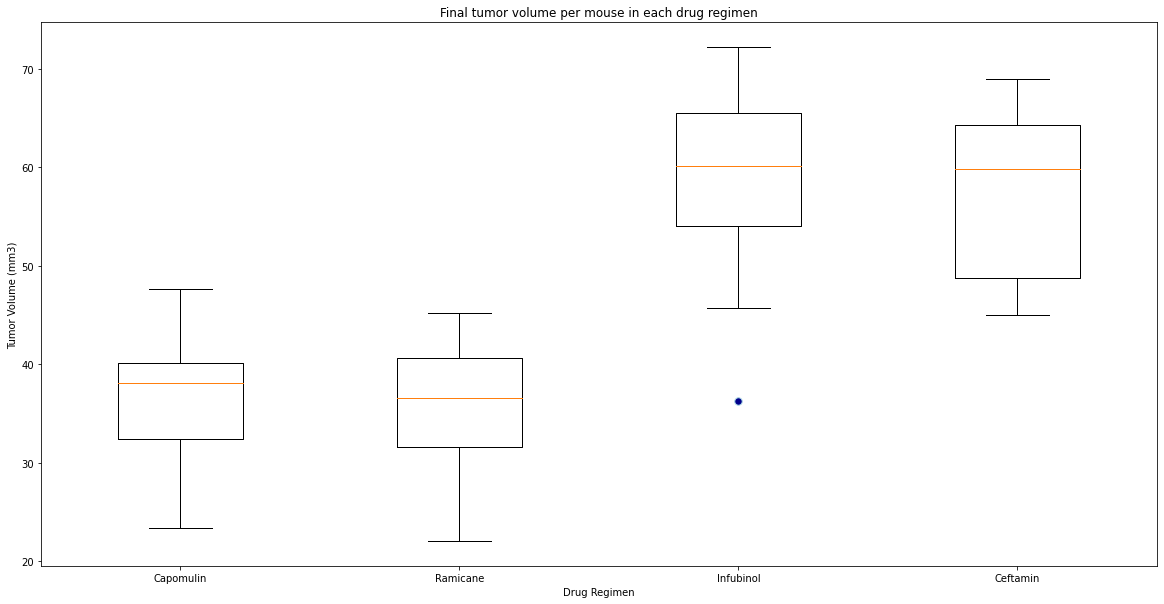

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#solution @ https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary/52274064
my_dict = {'Capomulin': list(capo_final_vol_series), 'Ramicane': list(tumor_vol_list_rami),
           'Infubinol': list(tumor_vol_list_infu), 'Ceftamin': list(tumor_vol_list_ceft)}

fig, ax = plt.subplots()

#https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib 
flierprops = dict(marker = '.', markerfacecolor='darkblue', markersize=15,
                  linestyle='none', markeredgecolor='lightblue')

ax.boxplot(my_dict.values(), showfliers = True, flierprops = flierprops)
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")
ax.set_title("Final tumor volume per mouse in each drug regimen")
fig.set_size_inches(20,10)

## Line and Scatter Plots

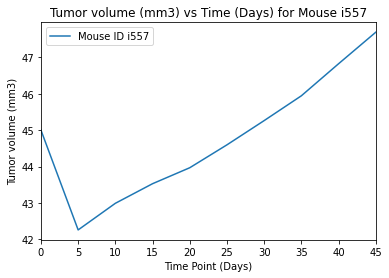

In [157]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = cleaned_df_filt_capo.loc[cleaned_df_filt_capo["Mouse ID"] == "i557","Timepoint"]
y_axis = cleaned_df_filt_capo.loc[cleaned_df_filt_capo["Mouse ID"] == "i557","Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis, label = "Mouse ID i557")
plt.xlim(0,45)
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor volume (mm3)")
plt.legend()
plt.title("Tumor volume (mm3) vs Time (Days) for Mouse i557")

plt.show()

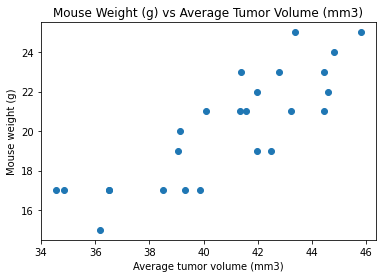

In [158]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_ax = cleaned_df_filt_capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y_ax = cleaned_df_filt_capo.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(x_ax,y_ax)

plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Average tumor volume (mm3)")
plt.ylabel("Mouse weight (g)")

plt.show()

## Correlation and Regression

The correlation coefficient is 0.84


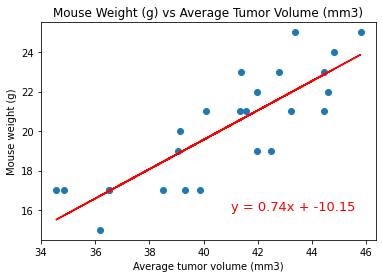

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_ax,y_ax)
print(f"The correlation coefficient is {round(correlation[0],2)}")

plt.scatter(x_ax,y_ax)
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel("Average tumor volume (mm3)")
plt.ylabel("Mouse weight (g)")

#linear regression values 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_ax, y_ax)
regress_values = x_ax*slope + intercept
plt.plot(x_ax, regress_values, "red")

#line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(41,16),fontsize = 13, color = "red")

plt.show()